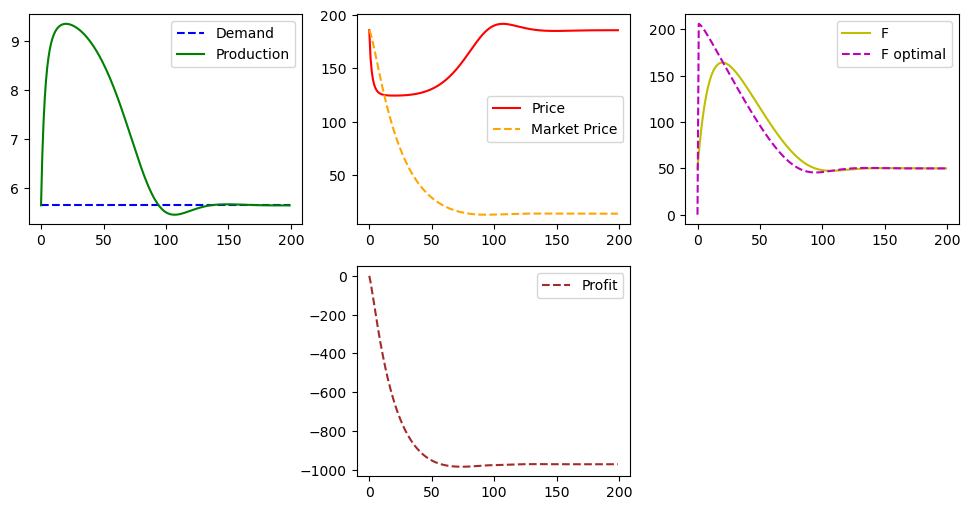

In [45]:
import numpy as np
import matplotlib.pyplot as plt

ymax = 10
Nr = 60
p_M = 150
p0 = 1000
p_F = 1

def production(F):
    return ymax * (1 - np.exp(-1/Nr * F))

def F_optimal(p_M):
    return -Nr * np.log(p_F * Nr / (ymax * p_M))


# Number of time steps in the simulation
num_steps = 200

# Arrays to store values over the simulation
F_opt = np.zeros(num_steps)
F = np.zeros(num_steps)
prod = np.zeros(num_steps)
price = np.zeros(num_steps)
market_price = np.zeros(num_steps)
profit = np.zeros(num_steps)
wealth = np.zeros(num_steps)

# Initial values
F_opt[0] = 0
F[0] = 50
prod[0] = production(F[0])
demand = prod[0]
price[0] = (F[0] * p_F + p0)/prod[0]
market_price[0] = price[0]
profit[0] = 0
wealth[0] = 0

# Simulation loop
for t in range(1, num_steps):
    F_opt[t] = F_optimal(market_price[t-1])
    F[t] = 0.9 * F[t-1] + 0.1 * F_opt[t]
    prod[t] = production(F[t])
    price[t] = (F[t] * p_F + p0)/prod[t]
    market_price[t] = market_price[t-1] * (1 + 0.1 * (demand - prod[t])/prod[t])
    profit[t] = market_price[t] * np.minimum(1, demand/prod[t]) * prod[t] - F[t] * p_F - p0
    wealth[t] = wealth[t-1] + profit[t]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting demand and production
plt.subplot(2, 3, 1)
plt.plot(range(num_steps), demand * np.ones(num_steps), label='Demand', linestyle='--', color='blue')
plt.plot(range(num_steps), prod, label='Production', linestyle='-', color='green')
plt.legend()

# Plotting price and market price
plt.subplot(2, 3, 2)
plt.plot(range(num_steps), price, label='Price', linestyle='-', color='red')
plt.plot(range(num_steps), market_price, label='Market Price', linestyle='--', color='orange')
plt.legend()

# Plotting fertilizer
plt.subplot(2, 3, 3)
plt.plot(range(num_steps), F, label='F', linestyle='-', color='y')
plt.plot(range(num_steps), F_opt, label='F optimal', linestyle='--', color='m')
plt.legend()

# Plotting profit and wealth
plt.subplot(2, 3, 5)
# plt.plot(range(num_steps), profit, label='Profit', linestyle='-', color='purple')
plt.plot(range(num_steps), profit, label='Profit', linestyle='--', color='brown')
plt.legend()


Adding markup doesn't change anything

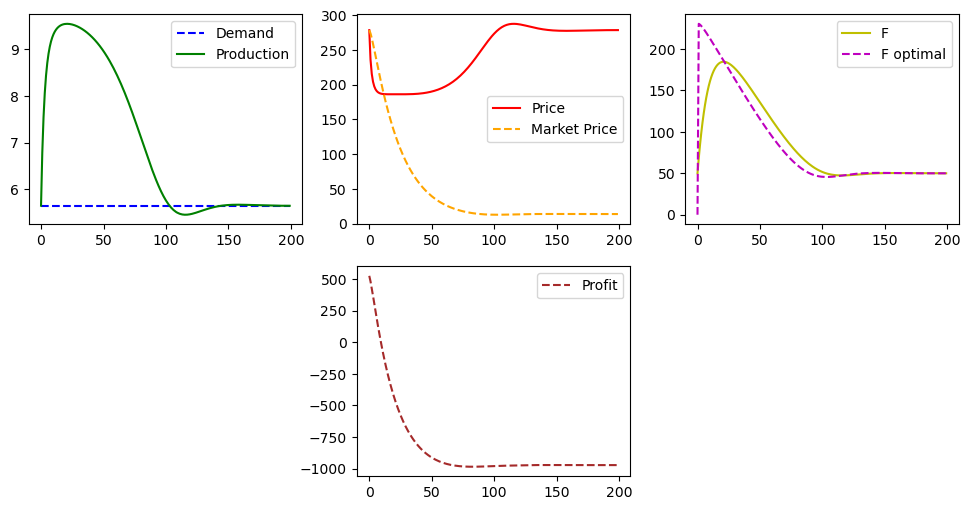

In [52]:
import numpy as np
import matplotlib.pyplot as plt

ymax = 10
Nr = 60
p_M = 150
p0 = 1000
p_F = 1

def production(F):
    return ymax * (1 - np.exp(-1/Nr * F))

def F_optimal(p_M):
    return -Nr * np.log(p_F * Nr / (ymax * p_M))


# Number of time steps in the simulation
num_steps = 200

# Arrays to store values over the simulation
F_opt = np.zeros(num_steps)
F = np.zeros(num_steps)
prod = np.zeros(num_steps)
price = np.zeros(num_steps)
market_price = np.zeros(num_steps)
profit = np.zeros(num_steps)
wealth = np.zeros(num_steps)

# Initial values
F_opt[0] = 0
F[0] = 50
prod[0] = production(F[0])
demand = prod[0]
price[0] = 1.5 * (F[0] * p_F + p0)/prod[0]
market_price[0] = price[0]
profit[0] = market_price[0] * prod[0] - F[0] * p_F - p0
wealth[0] = 0

# Simulation loop
for t in range(1, num_steps):
    F_opt[t] = F_optimal(market_price[t-1])
    F[t] = 0.9 * F[t-1] + 0.1 * F_opt[t]
    prod[t] = production(F[t])
    price[t] = 1.5 * (F[t] * p_F + p0)/prod[t]
    market_price[t] = market_price[t-1] * (1 + 0.1 * (demand - prod[t])/prod[t])
    profit[t] = market_price[t] * np.minimum(1, demand/prod[t]) * prod[t] - F[t] * p_F - p0
    wealth[t] = wealth[t-1] + profit[t]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting demand and production
plt.subplot(2, 3, 1)
plt.plot(range(num_steps), demand * np.ones(num_steps), label='Demand', linestyle='--', color='blue')
plt.plot(range(num_steps), prod, label='Production', linestyle='-', color='green')
plt.legend()

# Plotting price and market price
plt.subplot(2, 3, 2)
plt.plot(range(num_steps), price, label='Price', linestyle='-', color='red')
plt.plot(range(num_steps), market_price, label='Market Price', linestyle='--', color='orange')
plt.legend()

# Plotting fertilizer
plt.subplot(2, 3, 3)
plt.plot(range(num_steps), F, label='F', linestyle='-', color='y')
plt.plot(range(num_steps), F_opt, label='F optimal', linestyle='--', color='m')
plt.legend()

# Plotting profit and wealth
plt.subplot(2, 3, 5)
# plt.plot(range(num_steps), profit, label='Profit', linestyle='-', color='purple')
plt.plot(range(num_steps), profit, label='Profit', linestyle='--', color='brown')
plt.legend()


Adding the fracion sold

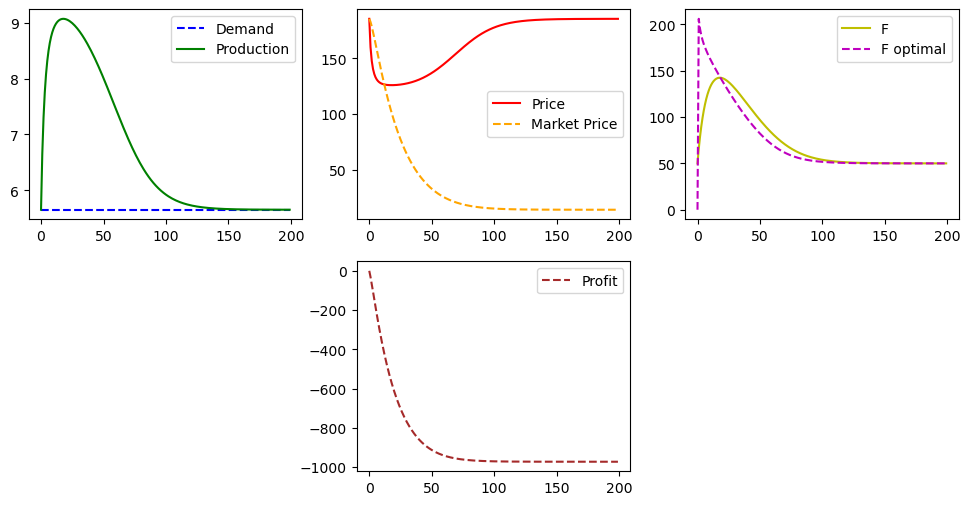

In [50]:
import numpy as np
import matplotlib.pyplot as plt

ymax = 10
Nr = 60
p_M = 150
p0 = 1000
p_F = 1

def production(F):
    return ymax * (1 - np.exp(-1/Nr * F))

def F_optimal(p_M, fraction_sold):
    return -Nr * np.log(p_F * Nr / (fraction_sold * ymax * p_M))


# Number of time steps in the simulation
num_steps = 200

# Arrays to store values over the simulation
F_opt = np.zeros(num_steps)
F = np.zeros(num_steps)
prod = np.zeros(num_steps)
price = np.zeros(num_steps)
market_price = np.zeros(num_steps)
profit = np.zeros(num_steps)
wealth = np.zeros(num_steps)
fraction_sold = np.zeros(num_steps)

# Initial values
F_opt[0] = 0
F[0] = 50
prod[0] = production(F[0])
demand = prod[0]
price[0] = (F[0] * p_F + p0)/prod[0]
market_price[0] = price[0]
profit[0] = 0
wealth[0] = 0
fraction_sold[0] = 1

# Simulation loop
for t in range(1, num_steps):
    F_opt[t] = F_optimal(market_price[t-1], fraction_sold[t-1])
    F[t] = 0.9 * F[t-1] + 0.1 * F_opt[t]
    prod[t] = production(F[t])
    price[t] = (F[t] * p_F + p0)/prod[t]
    market_price[t] = market_price[t-1] * (1 + 0.1 * (demand - prod[t])/prod[t])
    fraction_sold[t] = np.minimum(1, demand/prod[t])
    profit[t] = market_price[t] * fraction_sold[t] * prod[t] - F[t] * p_F - p0
    wealth[t] = wealth[t-1] + profit[t]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting demand and production
plt.subplot(2, 3, 1)
plt.plot(range(num_steps), demand * np.ones(num_steps), label='Demand', linestyle='--', color='blue')
plt.plot(range(num_steps), prod, label='Production', linestyle='-', color='green')
plt.legend()

# Plotting price and market price
plt.subplot(2, 3, 2)
plt.plot(range(num_steps), price, label='Price', linestyle='-', color='red')
plt.plot(range(num_steps), market_price, label='Market Price', linestyle='--', color='orange')
plt.legend()

# Plotting fertilizer
plt.subplot(2, 3, 3)
plt.plot(range(num_steps), F, label='F', linestyle='-', color='y')
plt.plot(range(num_steps), F_opt, label='F optimal', linestyle='--', color='m')
plt.legend()

# Plotting profit and wealth
plt.subplot(2, 3, 5)
# plt.plot(range(num_steps), profit, label='Profit', linestyle='-', color='purple')
plt.plot(range(num_steps), profit, label='Profit', linestyle='--', color='brown')
plt.legend()


# Market price from supply-demand curve

In this case, the market price is that one obtained from the closing price. 

* The production never decreases 

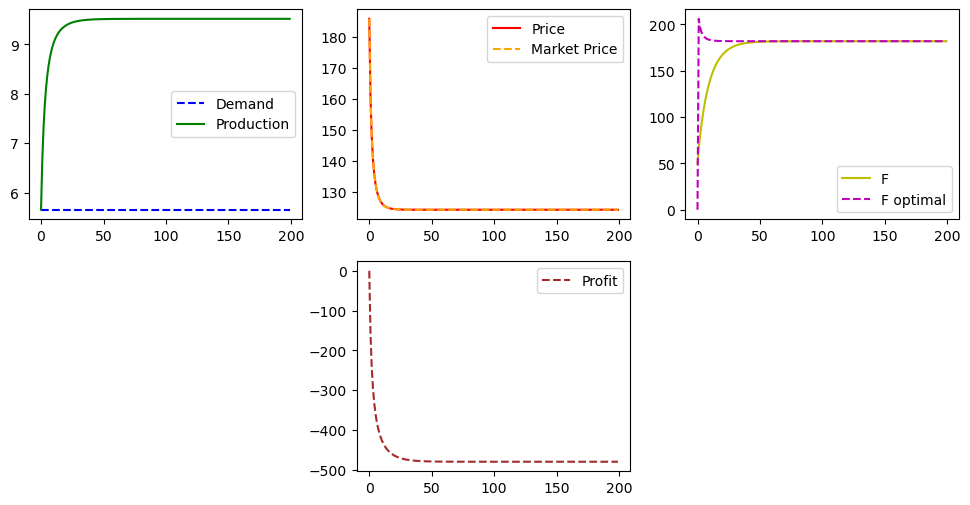

In [46]:
import numpy as np
import matplotlib.pyplot as plt

ymax = 10
Nr = 60
p_M = 150
p0 = 1000
p_F = 1

def production(F):
    return ymax * (1 - np.exp(-1/Nr * F))

def F_optimal(p_M):
    return -Nr * np.log(p_F * Nr / (ymax * p_M))


# Number of time steps in the simulation
num_steps = 200

# Arrays to store values over the simulation
F_opt = np.zeros(num_steps)
F = np.zeros(num_steps)
prod = np.zeros(num_steps)
price = np.zeros(num_steps)
market_price = np.zeros(num_steps)
profit = np.zeros(num_steps)
wealth = np.zeros(num_steps)

# Initial values
F_opt[0] = 0
F[0] = 50
prod[0] = production(F[0])
demand = prod[0]
price[0] = (F[0] * p_F + p0)/prod[0]
market_price[0] = price[0]
profit[0] = 0
wealth[0] = 0

# Simulation loop
for t in range(1, num_steps):
    F_opt[t] = F_optimal(market_price[t-1])
    F[t] = 0.9 * F[t-1] + 0.1 * F_opt[t]
    prod[t] = production(F[t])
    price[t] = (F[t] * p_F + p0)/prod[t]
    market_price[t] = price[t]
    profit[t] = market_price[t] * np.minimum(1, demand/prod[t]) * prod[t] - F[t] * p_F - p0
    wealth[t] = wealth[t-1] + profit[t]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting demand and production
plt.subplot(2, 3, 1)
plt.plot(range(num_steps), demand * np.ones(num_steps), label='Demand', linestyle='--', color='blue')
plt.plot(range(num_steps), prod, label='Production', linestyle='-', color='green')
plt.legend()

# Plotting price and market price
plt.subplot(2, 3, 2)
plt.plot(range(num_steps), price, label='Price', linestyle='-', color='red')
plt.plot(range(num_steps), market_price, label='Market Price', linestyle='--', color='orange')
plt.legend()

# Plotting fertilizer
plt.subplot(2, 3, 3)
plt.plot(range(num_steps), F, label='F', linestyle='-', color='y')
plt.plot(range(num_steps), F_opt, label='F optimal', linestyle='--', color='m')
plt.legend()

# Plotting profit and wealth
plt.subplot(2, 3, 5)
# plt.plot(range(num_steps), profit, label='Profit', linestyle='-', color='purple')
plt.plot(range(num_steps), profit, label='Profit', linestyle='--', color='brown')
plt.legend()


Now we can introduce the possibility of making conscious of the fact I cannot sell everything:

$$ \mathcal{P} = \hat{p}^M \hat{y}_{sold}  - \mathcal{cost}$$

$$\hat{y}_{sold} = \min\left(1, \frac{D}{Y}\right)$$

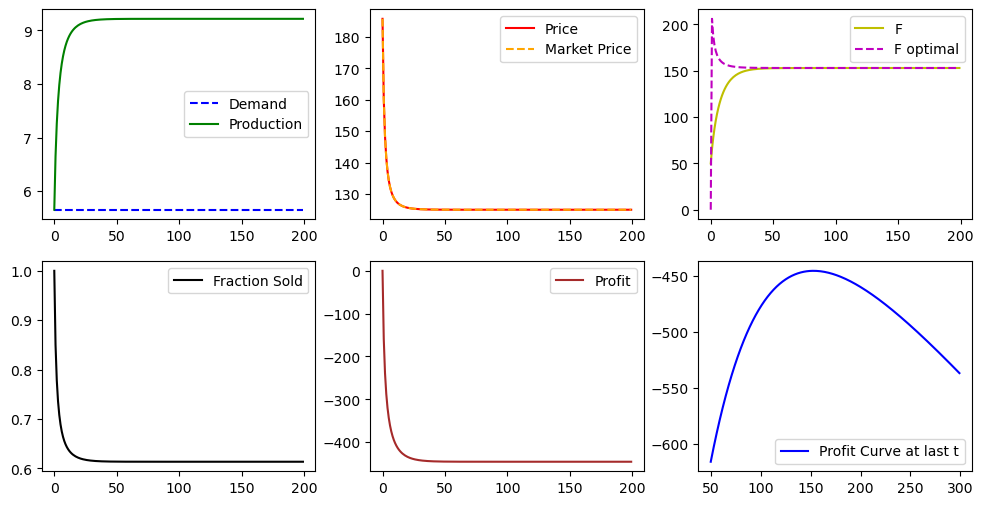

In [48]:
import numpy as np
import matplotlib.pyplot as plt

ymax = 10
Nr = 60
p_M = 150
p0 = 1000
p_F = 1

def production(F):
    return ymax * (1 - np.exp(-1/Nr * F))

def F_optimal(p_M, fraction_sold):
    return -Nr * np.log(p_F * Nr / (fraction_sold * ymax * p_M))


# Number of time steps in the simulation
num_steps = 200

# Arrays to store values over the simulation
F_opt = np.zeros(num_steps)
F = np.zeros(num_steps)
prod = np.zeros(num_steps)
price = np.zeros(num_steps)
market_price = np.zeros(num_steps)
profit = np.zeros(num_steps)
wealth = np.zeros(num_steps)
fraction_sold = np.zeros(num_steps)

# Initial values
F_opt[0] = 0
F[0] = 50
prod[0] = production(F[0])
demand = prod[0]
price[0] = (F[0] * p_F + p0)/prod[0]
market_price[0] = price[0]
profit[0] = 0
wealth[0] = 0
fraction_sold[0] = 1

# Simulation loop
for t in range(1, num_steps):
    F_opt[t] = F_optimal(market_price[t-1], fraction_sold[t-1])
    F[t] = 0.9 * F[t-1] + 0.1 * F_opt[t]
    prod[t] = production(F[t])
    price[t] = (F[t] * p_F + p0)/prod[t]
    market_price[t] = price[t]
    fraction_sold[t] = np.minimum(1, demand/prod[t])
    profit[t] = market_price[t] * fraction_sold[t] * prod[t] - F[t] * p_F - p0
    wealth[t] = wealth[t-1] + profit[t]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting demand and production
plt.subplot(2, 3, 1)
plt.plot(range(num_steps), demand * np.ones(num_steps), label='Demand', linestyle='--', color='blue')
plt.plot(range(num_steps), prod, label='Production', linestyle='-', color='green')
plt.legend()

# Plotting price and market price
plt.subplot(2, 3, 2)
plt.plot(range(num_steps), price, label='Price', linestyle='-', color='red')
plt.plot(range(num_steps), market_price, label='Market Price', linestyle='--', color='orange')
plt.legend()

# Plotting fertilizer
plt.subplot(2, 3, 3)
plt.plot(range(num_steps), F, label='F', linestyle='-', color='y')
plt.plot(range(num_steps), F_opt, label='F optimal', linestyle='--', color='m')
plt.legend()

# Plotting profit and wealth
plt.subplot(2, 3, 5)
plt.plot(range(num_steps), profit, label='Profit', linestyle='-', color='brown')
plt.legend()

# Plotting profit and wealth
plt.subplot(2, 3, 4)
plt.plot(range(num_steps), fraction_sold, label='Fraction Sold', linestyle='-', color='k')
plt.legend()

# Plotting profit and wealth
plt.subplot(2, 3, 6)
plt.plot(np.arange(50, 300), market_price[-1] * fraction_sold[-1] * production(np.arange(50, 300)) - np.arange(50, 300) * p_F - p0 , label='Profit Curve at last t', linestyle='-', color='blue')
plt.legend()



# Heuristic Rule

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


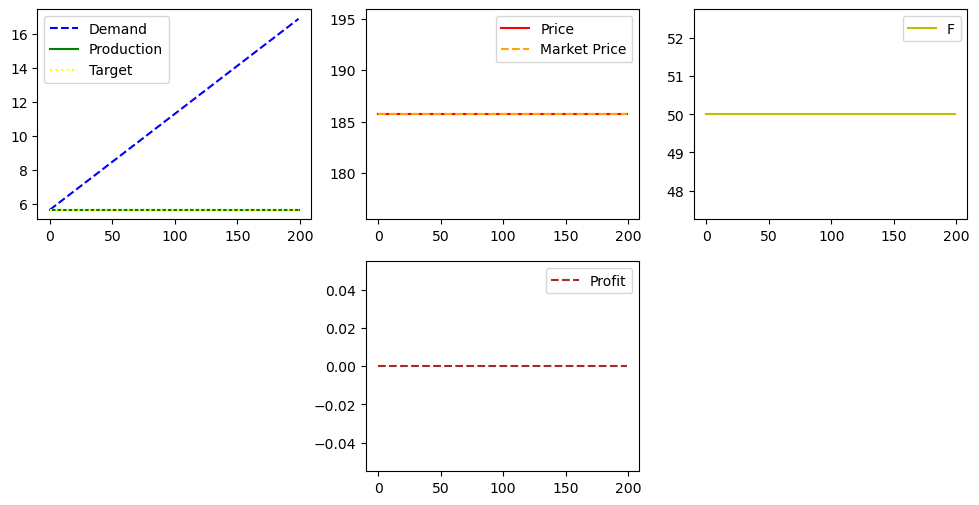

In [22]:
import numpy as np
import matplotlib.pyplot as plt

ymax = 10
Nr = 60
p_M = 150
p0 = 1000
p_F = 1

def production(F):
    return ymax * (1 - np.exp(-1/Nr * F))

def F_optimal(p_M):
    return -Nr * np.log(p_F * Nr / (ymax * p_M))

def F_from_target(y_target):
    return -Nr * np.log(1 - y_target/ymax)


# Number of time steps in the simulation
num_steps = 200

# Arrays to store values over the simulation
F_opt = np.zeros(num_steps)
Y_target = np.zeros(num_steps)
F = np.zeros(num_steps)
prod = np.zeros(num_steps)
price = np.zeros(num_steps)
market_price = np.zeros(num_steps)
profit = np.zeros(num_steps)
wealth = np.zeros(num_steps)
demand = np.zeros(num_steps)

# Initial values
F_opt[0] = 0
F[0] = 50
Y_target[0] = production(F[0])
prod[0] = production(F[0])
demand[0] = prod[0]
price[0] = (F[0] * p_F + p0)/prod[0]
market_price[0] = price[0]
profit[0] = 0
wealth[0] = 0

# Simulation loop
for t in range(1, num_steps):
    demand[t] = demand[t-1] + 0.01 * demand[0] 
    Y_target[t] = prod[t-1] * (1 + 0.05 * np.random.rand() * np.sign(profit[t-1]) * (ymax - prod[t-1])/ymax)
    F[t] = F_from_target(Y_target[t])
    prod[t] = production(F[t])
    price[t] = (F[t] * p_F + p0)/prod[t]
    market_price[t] = price[t]
    profit[t] = market_price[t] * np.minimum(1, demand[t]/prod[t]) * prod[t] - F[t] * p_F - p0
    wealth[t] = wealth[t-1] + profit[t]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting demand and production
plt.subplot(2, 3, 1)
plt.plot(range(num_steps), demand * np.ones(num_steps), label='Demand', linestyle='--', color='blue')
plt.plot(range(num_steps), prod, label='Production', linestyle='-', color='green')
plt.plot(range(num_steps), Y_target, label='Target', linestyle=':', color='yellow')
plt.legend()

# Plotting price and market price
plt.subplot(2, 3, 2)
plt.plot(range(num_steps), price, label='Price', linestyle='-', color='red')
plt.plot(range(num_steps), market_price, label='Market Price', linestyle='--', color='orange')
plt.legend()

# Plotting fertilizer
plt.subplot(2, 3, 3)
plt.plot(range(num_steps), F, label='F', linestyle='-', color='y')
# plt.plot(range(num_steps), F_opt, label='F optimal', linestyle='--', color='m')
plt.legend()

# Plotting profit and wealth
plt.subplot(2, 3, 5)
# plt.plot(range(num_steps), profit, label='Profit', linestyle='-', color='purple')
plt.plot(range(num_steps), profit, label='Profit', linestyle='--', color='brown')
plt.legend()
